In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("metadata.csv")

In [3]:
df.head(10)

,TIME,POWER(WATTS),CPULOAD(PERCENT),MEMUSED(MB),MEMFREE(MB)
0,1700657767,109,0.00,7845,367069
1,1700657773,189,0.00,7846,367068
2,1700657779,187,0.00,7847,367067
3,1700657786,130,0.00,7849,367066
4,1700657793,80,0.16,7854,367061
5,1700657799,254,7.43,8079,366652
6,1700657805,300,14.36,11295,362927
7,1700657810,293,20.82,17439,356752
8,1700657817,303,26.84,17439,356752
9,1700657823,310,37.47,17704,356487


In [4]:
df.describe()

,TIME,POWER(WATTS),CPULOAD(PERCENT),MEMUSED(MB),MEMFREE(MB)
count,4.870000e+02,487.000000,487.000000,487.000000,487.000000
mean,1.700659e+09,443.431211,92.489199,23121.178645,350673.671458
std,8.495146e+02,63.719896,14.126264,3021.057529,3200.367390
min,1.700658e+09,79.000000,0.000000,7845.000000,349638.000000
25%,1.700658e+09,449.000000,95.950000,23723.500000,349739.500000
50%,1.700659e+09,463.000000,96.010000,23819.000000,349908.000000
75%,1.700660e+09,468.000000,96.070000,23907.000000,350128.500000
max,1.700661e+09,483.000000,96.220000,23994.000000,367069.000000


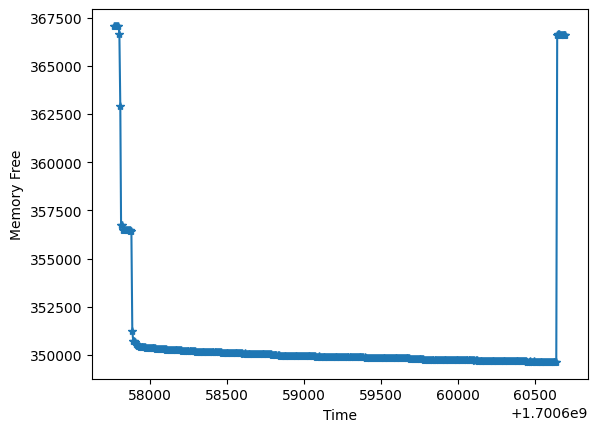

In [5]:
plt.plot(df["TIME"],df["MEMFREE(MB)"],marker="*")
plt.xlabel("Time")
plt.ylabel("Memory Free")
plt.show()

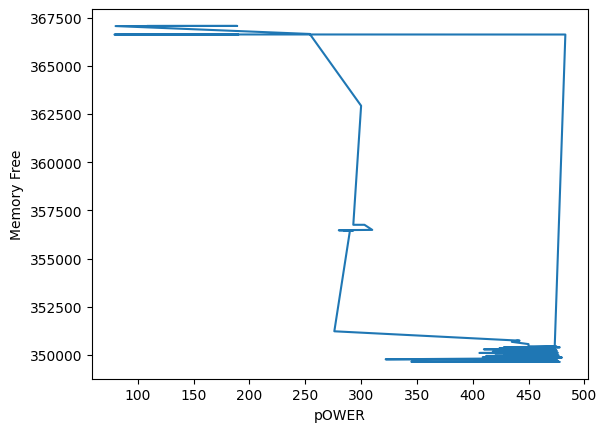

In [6]:
plt.plot(df["POWER(WATTS)"],df["MEMFREE(MB)"])
plt.xlabel("pOWER")
plt.ylabel("Memory Free")
plt.show()

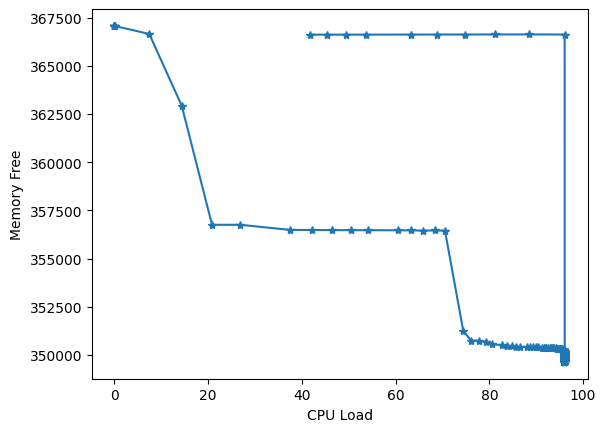

In [7]:
plt.plot(df["CPULOAD(PERCENT)"],df["MEMFREE(MB)"],marker="*")
plt.xlabel("CPU Load")
plt.ylabel("Memory Free")
plt.show()

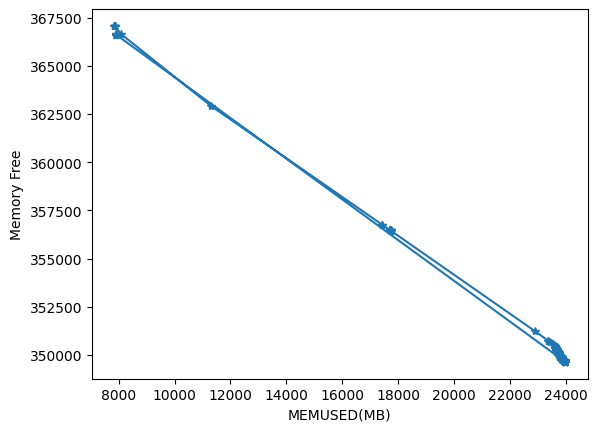

In [8]:
plt.plot(df["MEMUSED(MB)"],df["MEMFREE(MB)"],marker="*")
plt.xlabel("MEMUSED(MB)")
plt.ylabel("Memory Free")
plt.show()

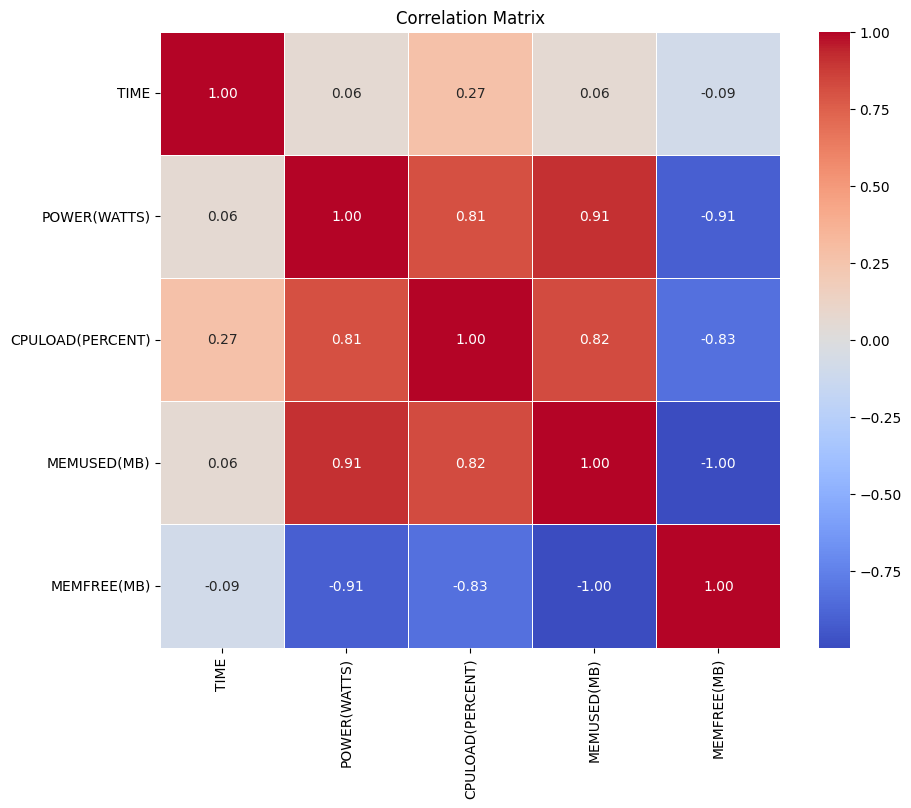

In [9]:
cor = df.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


### We can see that Time doesn't even affect Memory available

In [10]:
reg_df = df.drop("TIME",axis=1)
reg_df

,POWER(WATTS),CPULOAD(PERCENT),MEMUSED(MB),MEMFREE(MB)
0,109,0.00,7845,367069
1,189,0.00,7846,367068
2,187,0.00,7847,367067
3,130,0.00,7849,367066
4,80,0.16,7854,367061
...,...,...,...,...
482,79,63.29,7900,366621
483,88,53.64,7902,366618
484,190,49.35,7905,366617
485,125,45.39,7908,366614


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = reg_df.drop("MEMFREE(MB)",axis=1)
y = reg_df["MEMFREE(MB)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
# Assuming 'model' is your trained LinearRegression model
r2_score = model.score(X_test, y_test)
print(f"R-squared Score: {r2_score}")


Mean Squared Error: 11882.390788711082
Coefficients: [ 0.34973557 -5.38331928 -1.04348193]
Intercept: 375140.6143679967
R-squared Score: 0.9993136012269076


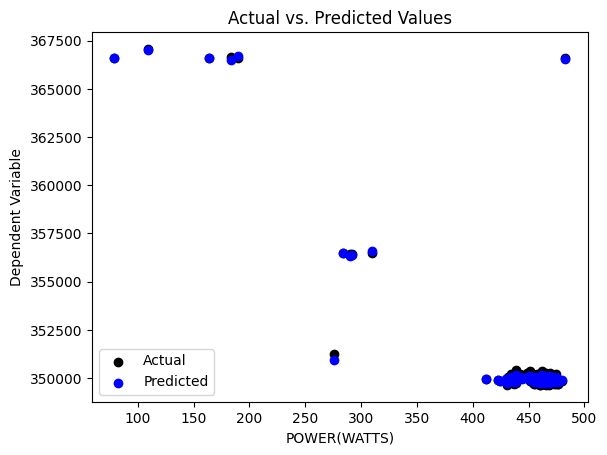

In [13]:
power_watts_column_index = X_test.columns.get_loc("POWER(WATTS)")

plt.scatter(X_test.iloc[:, power_watts_column_index], y_test, color='black', label='Actual')
plt.scatter(X_test.iloc[:, power_watts_column_index], y_pred, color='blue', label='Predicted')
plt.xlabel("POWER(WATTS)")
plt.ylabel('Dependent Variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

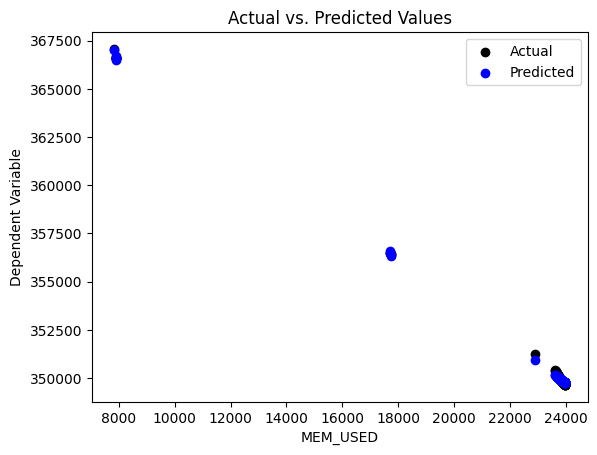

In [16]:
MEMUSED_column_index = X_test.columns.get_loc("MEMUSED(MB)")

plt.scatter(X_test.iloc[:, MEMUSED_column_index], y_test, color='black', label='Actual')
plt.scatter(X_test.iloc[:, MEMUSED_column_index], y_pred, color='blue', label='Predicted')
plt.xlabel("MEM_USED")
plt.ylabel('Dependent Variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

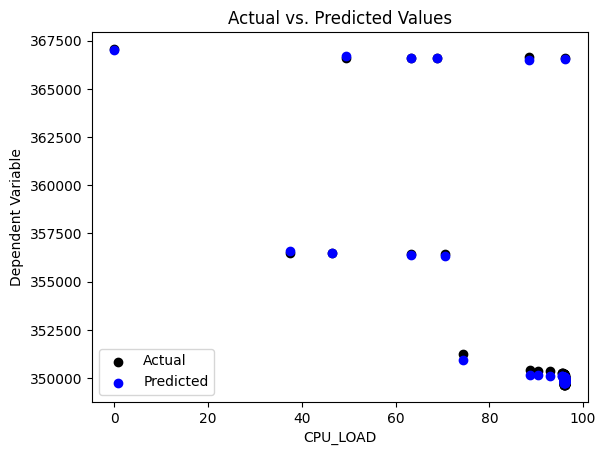

In [17]:
CPULOAD_column_index = X_test.columns.get_loc("CPULOAD(PERCENT)")

plt.scatter(X_test.iloc[:, CPULOAD_column_index], y_test, color='black', label='Actual')
plt.scatter(X_test.iloc[:, CPULOAD_column_index], y_pred, color='blue', label='Predicted')
plt.xlabel("CPU_LOAD")
plt.ylabel('Dependent Variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [18]:
import pickle

# Save the model weights and biases
with open('memory_free_calculation.pkl', 'wb') as file:
    pickle.dump(model, file)

In [22]:
with open('memory_free_calculation.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
loaded_model.predict([[79,63.29,7900]])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([366584.02597918])

In [26]:
print(f"Coefficients : \n 1) Power : {loaded_model.coef_[0]} \n 2) CPU Load : {loaded_model.coef_[1]} \n 3) Memory Used : {loaded_model.coef_[2]}")
print(f"Intercept value : {loaded_model.intercept_}")

Coefficients : 
 1) Power : 0.34973557030809765 
 2) CPU Load : -5.383319276217316 
 3) Memory Used : -1.0434819268204638
Intercept value : 375140.6143679967


### Before jumping on to time series Multivariate Analysis using VAR (Variable Auto Regressive method) we shall try other techniques of simple machine learning models to check the accuracy. Wih random try in other techniques of ML